# SOLVING TRAINING PROBLEMS OF NEURAL NETWORKS

In this exercise, we will look at possible problems that might occur during training and how to solve them.

**a) Setup a training environment similar to the one that was used in Exercise 3c):**

*   Fetch the MNIST dataset and scale the data.
*   Build the same deep model variant.
*   Set up the same training loop.

**b) Try to improve the model by adding a dropout layer after the last hidden layer. Set its dropout rate to 0.25.**

*   What is the training and testing accuracy of the modified setup?
*   How does dropout work and why is it effective?

**c) Try to improve the model by adding batch normalization to each hidden layer.**

*   What is the training and testing accuracy of the modified setup?
*   How does batch normalization work and why is it effective?

**d) Try to improve the model by adding an l1 regularization on the weights of each hidden layer.**

*   What is the training and testing accuracy of the modified setup?
*   How does regularization work and why is it effective?

**e) Visualize the training curves of accuracy and cross-entropy of all models from before in a single diagram. Compare the curves.**

**Hint:** If you encounter performance problems (freezes, extremely long training times) while training the model, feel free to decrease the number of epochs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
# a) Setup a training environment
# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # Scale the data to [0, 1]
y = mnist.target.astype(np.int)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the deep model variant
def create_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Compile the model
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up the training loop
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

C:\Users\Tung\AppData\Local\Temp\ipykernel_1824\1075854211.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = mnist.target.astype(np.int)


Epoch 1/5
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2523 - accuracy: 0.9252 - val_loss: 0.1398 - val_accuracy: 0.9578
Epoch 2/5
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1050 - accuracy: 0.9674 - val_loss: 0.1118 - val_accuracy: 0.9668
Epoch 3/5
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0720 - accuracy: 0.9777 - val_loss: 0.1174 - val_accuracy: 0.9654
Epoch 4/5
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9826 - val_loss: 0.1103 - val_accuracy: 0.9677
Epoch 5/5
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0922 - val_accuracy: 0.9719


438/438 [==============================] - 1s 1ms/step


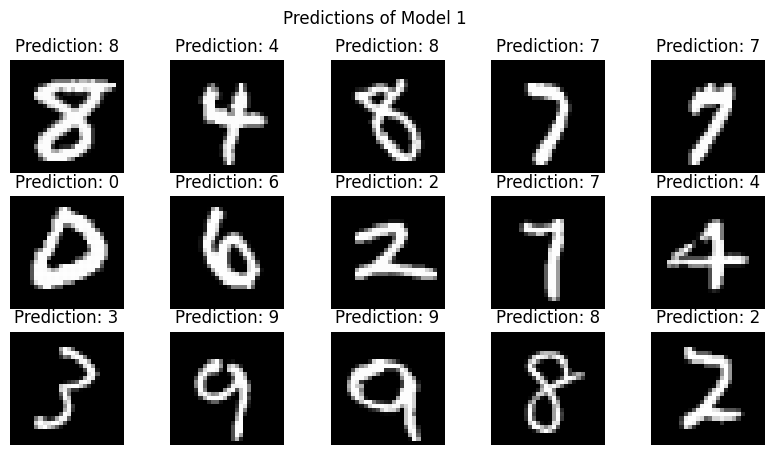

In [30]:
# show the predictions of model 1
predictions = model.predict(X_test)
plt.figure(figsize=(10, 5))
plt.suptitle('Predictions of Model 1')
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test.iloc[i].values.reshape((28, 28)), cmap='gray')
    plt.axis('off')
    plt.title(f'Prediction: {np.argmax(predictions[i])}')
plt.show()


In [3]:
# b) Add a dropout layer
model_dropout = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.25),  # Dropout layer
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_dropout.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the modified model
history_dropout = model_dropout.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_acc = model_dropout.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model_dropout.evaluate(X_test, y_test, verbose=0)
print(f'Model with Dropout - Training accuracy: {train_acc:.4f}, Testing accuracy: {test_acc:.4f}')

# Explanation of Dropout:
# Dropout works by randomly setting a fraction of the input units to 0 during training,
# which helps prevent overfitting. It forces the network to learn redundant representations.

Epoch 1/5
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3054 - accuracy: 0.9065 - val_loss: 0.1470 - val_accuracy: 0.9566
Epoch 2/5
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1438 - accuracy: 0.9573 - val_loss: 0.1180 - val_accuracy: 0.9646
Epoch 3/5
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1124 - accuracy: 0.9643 - val_loss: 0.1017 - val_accuracy: 0.9696
Epoch 4/5
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0950 - accuracy: 0.9702 - val_loss: 0.0973 - val_accuracy: 0.9708
Epoch 5/5
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9734 - val_loss: 0.0890 - val_accuracy: 0.9738
Model with Dropout - Training accuracy: 0.9874, Testing accuracy: 0.9738


438/438 [==============================] - 1s 1ms/step


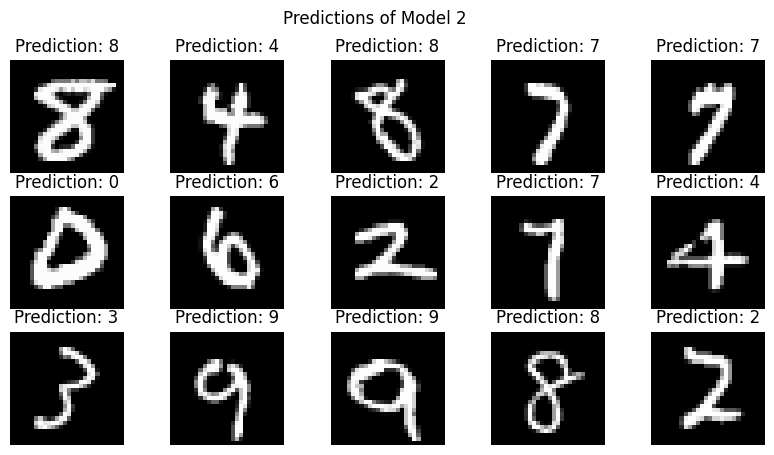

In [31]:
# show the predictions of model 2
predictions = model_dropout.predict(X_test)
plt.figure(figsize=(10, 5))
plt.suptitle('Predictions of Model 2')
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test.iloc[i].values.reshape((28, 28)), cmap='gray')
    plt.axis('off')
    plt.title(f'Prediction: {np.argmax(predictions[i])}')
plt.show()


In [4]:
# c) Add batch normalization to each hidden layer
model_bn = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

model_bn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model with batch normalization
history_bn = model_bn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_acc = model_bn.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model_bn.evaluate(X_test, y_test, verbose=0)
print(f'Model with Batch Normalization - Training accuracy: {train_acc:.4f}, Testing accuracy: {test_acc:.4f}')

# Explanation of Batch Normalization:
# Batch normalization normalizes the output of a previous layer by subtracting the batch mean
# and dividing by the batch standard deviation. This stabilizes learning and often leads to faster convergence.

Epoch 1/5
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2543 - accuracy: 0.9240 - val_loss: 0.1525 - val_accuracy: 0.9553
Epoch 2/5
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1269 - accuracy: 0.9607 - val_loss: 0.1279 - val_accuracy: 0.9612
Epoch 3/5
1750/1750 [==============================] - 8s 5ms/step - loss: 0.0985 - accuracy: 0.9690 - val_loss: 0.1067 - val_accuracy: 0.9687
Epoch 4/5
1750/1750 [==============================] - 8s 5ms/step - loss: 0.0762 - accuracy: 0.9754 - val_loss: 0.0912 - val_accuracy: 0.9732
Epoch 5/5
1750/1750 [==============================] - 8s 4ms/step - loss: 0.0660 - accuracy: 0.9792 - val_loss: 0.0929 - val_accuracy: 0.9718
Model with Batch Normalization - Training accuracy: 0.9875, Testing accuracy: 0.9718


438/438 [==============================] - 1s 1ms/step


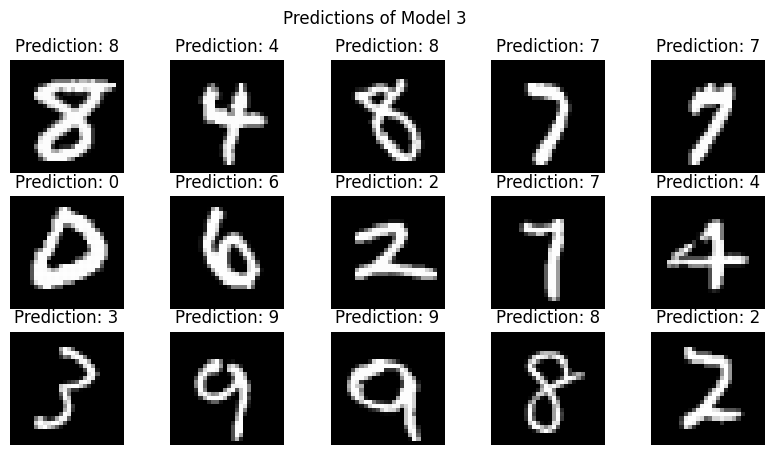

In [34]:
# show the predictions of model 3
predictions = model_bn.predict(X_test)
plt.figure(figsize=(10, 5))
plt.suptitle('Predictions of Model 3')
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test.iloc[i].values.reshape((28, 28)), cmap='gray')
    plt.axis('off')
    plt.title(f'Prediction: {np.argmax(predictions[i])}')
plt.show()

In [36]:
# d) Add L1 regularization
model_l1 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l1(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01)),
    layers.Dense(10, activation='softmax')
])

model_l1.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model with L1 regularization
history_l1 = model_l1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_acc = model_l1.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model_l1.evaluate(X_test, y_test, verbose=0)
print(f'Model with L1 Regularization - Training accuracy: {train_acc:.4f}, Testing accuracy: {test_acc:.4f}')

# Explanation of Regularization:
# L1 regularization adds a penalty equal to the absolute value of the magnitude of coefficients,
# which can result in sparse models and help prevent overfitting.

Epoch 1/5
1750/1750 [==============================] - 6s 3ms/step - loss: 2.5757 - accuracy: 0.7891 - val_loss: 1.3279 - val_accuracy: 0.8429
Epoch 2/5
1750/1750 [==============================] - 5s 3ms/step - loss: 1.2503 - accuracy: 0.8534 - val_loss: 1.1901 - val_accuracy: 0.8596
Epoch 3/5
1750/1750 [==============================] - 6s 3ms/step - loss: 1.1591 - accuracy: 0.8614 - val_loss: 1.1215 - val_accuracy: 0.8695
Epoch 4/5
1750/1750 [==============================] - 5s 3ms/step - loss: 1.0886 - accuracy: 0.8669 - val_loss: 1.0742 - val_accuracy: 0.8628
Epoch 5/5
1750/1750 [==============================] - 9s 5ms/step - loss: 1.0541 - accuracy: 0.8684 - val_loss: 1.0377 - val_accuracy: 0.8767
Model with L1 Regularization - Training accuracy: 0.8768, Testing accuracy: 0.8767


438/438 [==============================] - 1s 1ms/step


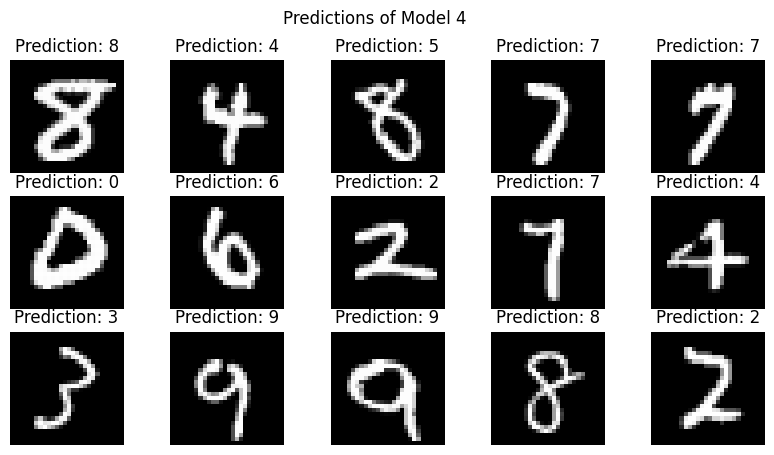

In [37]:
# show the predictions of model 4
predictions = model_l1.predict(X_test)
plt.figure(figsize=(10, 5))
plt.suptitle('Predictions of Model 4')
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test.iloc[i].values.reshape((28, 28)), cmap='gray')
    plt.axis('off')
    plt.title(f'Prediction: {np.argmax(predictions[i])}')
plt.show()


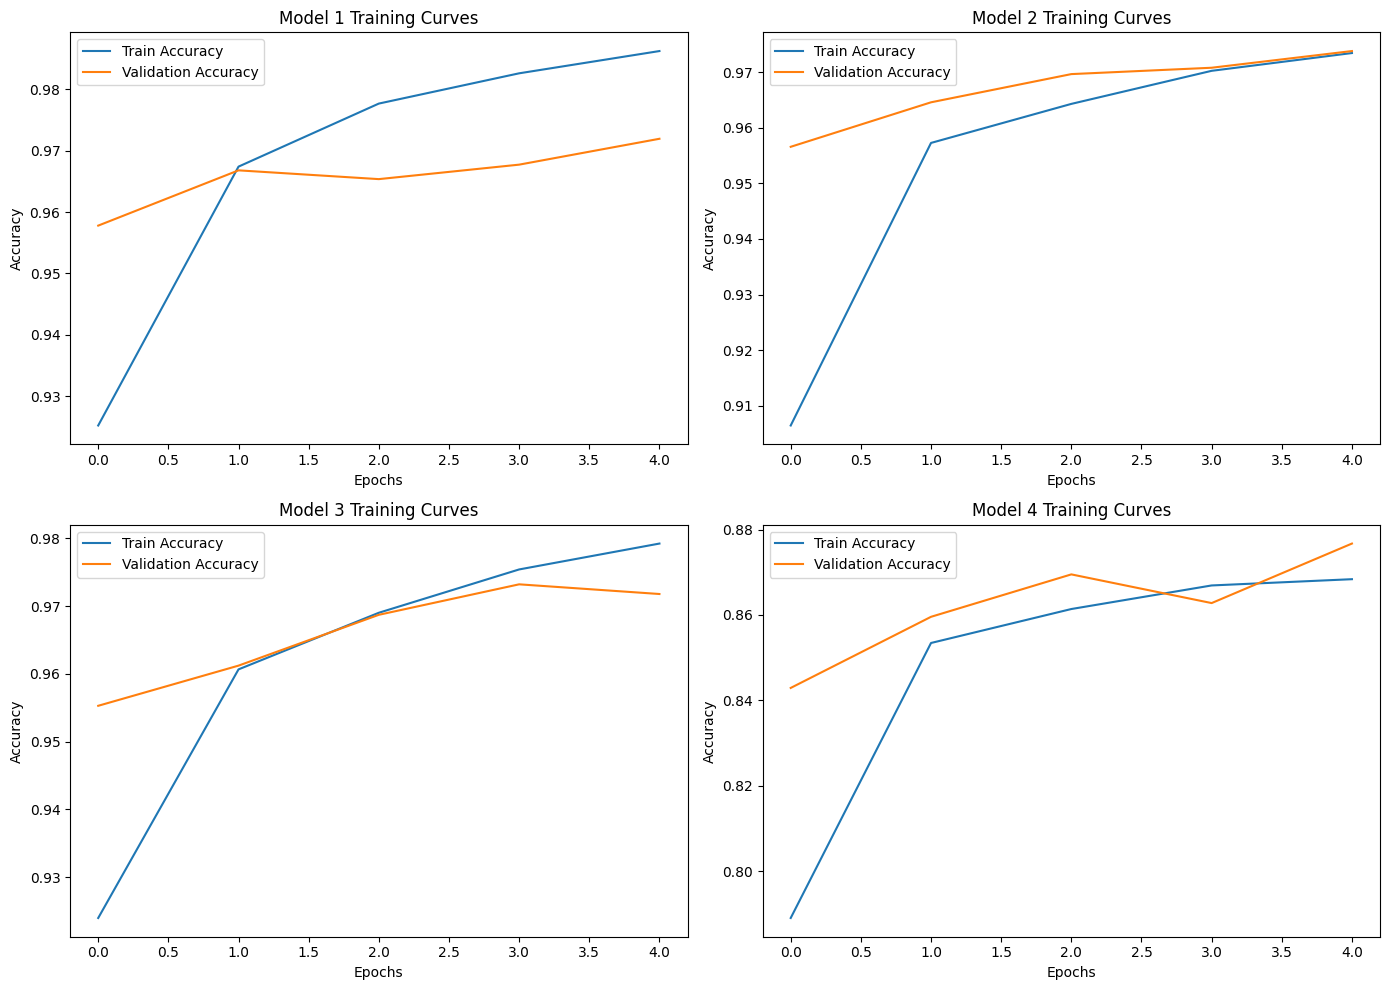

In [38]:
# e) Visualize the training curves
plt.figure(figsize=(14, 10))

# Plot training accuracy and loss for each model
for i, history in enumerate([history, history_dropout, history_bn, history_l1]):
    plt.subplot(2, 2, i + 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model {i+1} Training Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [40]:
# create a dataframe to store the results
import pandas as pd
data = {
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'Train Accuracy': [history.history['accuracy'][-1], history_dropout.history['accuracy'][-1],
                       history_bn.history['accuracy'][-1], history_l1.history['accuracy'][-1]],
    'Test Accuracy': [history.history['val_accuracy'][-1], history_dropout.history['val_accuracy'][-1],
                      history_bn.history['val_accuracy'][-1], history_l1.history['val_accuracy'][-1]]
}
df = pd.DataFrame(data)
print(df)

     Model  Train Accuracy  Test Accuracy
0  Model 1        0.868375       0.876714
1  Model 2        0.973429       0.973786
2  Model 3        0.979232       0.971786
3  Model 4        0.868375       0.876714
